In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.optimize

import warnings
warnings.filterwarnings('ignore')

Reglarized Linear Regression

In [72]:
datafile = 'data/ex5data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']
Xtest, ytest = mat['Xtest'], mat['ytest']

X = np.insert(X     ,0,1,axis=1)
Xval = np.insert(Xval   ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)

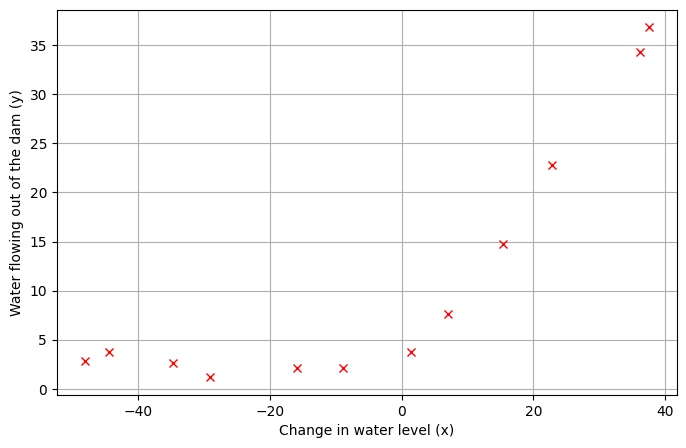

In [73]:
def plotDSata():
    plt.figure(figsize=(8,5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1],y,'rx')
    plt.grid(True)
plotDSata()

In [74]:
def h(theta,X):
    return np.dot(X,theta)
def computeCost(mytheta,myX,myy,mylambda=0.):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    m = myX.shape[0]
    myh = h(mytheta,myX).reshape((m,1))
    mycost = float((1./(2*m)) * np.dot((myh-myy).T,(myh-myy)))
    regterm = (float(mylambda)/(2*m)) * float(mytheta[1:].T.dot(mytheta[1:]))
    return mycost + regterm

In [75]:
mytheta = np.array([[1.],[1.]])
print (computeCost(mytheta,X,y,mylambda=1.))

303.9931922202643


In [76]:
def computeGradient(mytheta,myX,myy,mylambda=0.):
    mytheta = mytheta.reshape((mytheta.shape[0],1))
    m = myX.shape[0]
    myh = h(mytheta,myX).reshape((m,1))
    grad = (1./float(m))*myX.T.dot(h(mytheta,myX)-myy)
    regterm = (float(mylambda)/m)*mytheta
    regterm[0] = 0
    regterm.reshape((grad.shape[0],1))
    return grad + regterm
def computeGradientFlattened(mytheta,myX,myy,mylambda=0.):
    return computeGradient(mytheta,myX,myy,mylambda=0.).flatten()

In [77]:
mytheta = np.array([[1.],[1.]])
print(computeGradient(mytheta,X,y,1.))

[[-15.30301567]
 [598.25074417]]


In [78]:
def optimizeTheta(myTheta_initial, myX, myy, mylambda=0.,print_output=True):
    fit_theta = scipy.optimize.fmin_cg(computeCost,x0=myTheta_initial,\
                                       fprime=computeGradientFlattened,\
                                        args=(myX,myy,mylambda),\
                                            disp=print_output,\
                                                epsilon=1.49e-12,\
                                                    maxiter=1000)
    fit_theta = fit_theta.reshape((myTheta_initial.shape[0],1))
    return fit_theta

In [79]:
mytheta = np.array([[1.],[1]])
fit_theta = optimizeTheta(mytheta,X,y,0.)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


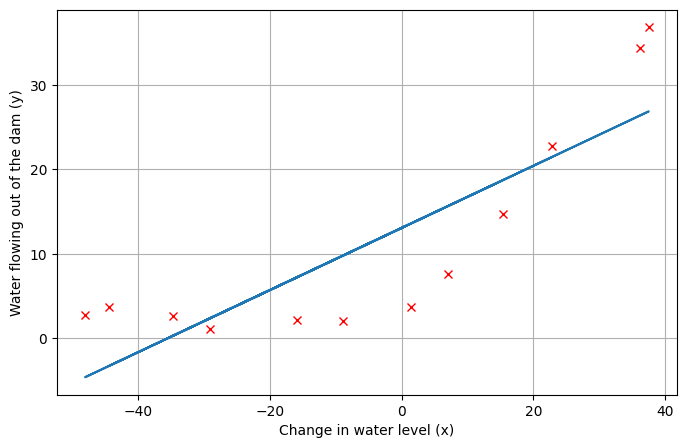

In [80]:
plotDSata()
plt.plot(X[:,1],h(fit_theta,X).flatten())

Bias-variance

In [81]:
def plotLearningCurve():
    """
    Loop over first training point, then first 2 training points, then first 3 ...
    and use each training-set-subset to find trained parameters.
    With those parameters, compute the cost on that subset (Jtrain)
    remembering that for Jtrain, lambda = 0 (even if you are using regularization).
    Then, use the trained parameters to compute Jval on the entire validation set
    again forcing lambda = 0 even if using regularization.
    Store the computed errors, error_train and error_val and plot them.
    """
    initial_theta = np.array([[1.],[1.]])
    mym, error_train, error_val =[], [], []
    for x in range(1,13,1):
        train_subset = X[:x,:]
        y_subset = y[:x]
        mym.append(y_subset.shape[0])
        fit_theta = optimizeTheta(initial_theta, train_subset, y_subset, mylambda=0.,print_output=False)
        error_train.append(computeCost(fit_theta,train_subset,y_subset,mylambda=0.))
        error_val.append(computeCost(fit_theta,Xval,yval,mylambda=0.))
    plt.figure(figsize=(8,5))
    plt.plot(mym,error_train,label='Train')
    plt.plot(mym,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training example')
    plt.ylabel('Error')
    plt.grid(True)

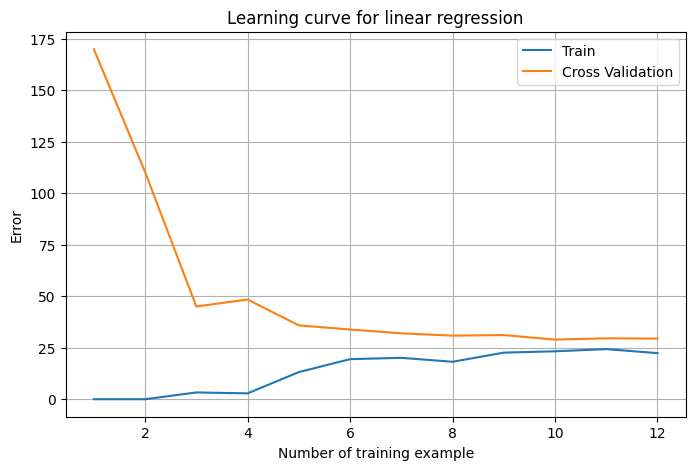

In [82]:
plotLearningCurve()

In [83]:
def genPolyFeatures(myX,p):
    """
    Function takes in the X matrix (with bias term already included as the first column)
    and returns an X matrix with "p" additional columns.
    The first additional column will be the 2nd column (first non-bias column) squared,
    the next additional column will be the 2nd column cubed, etc.
    """
    newX = myX.copy()
    for i in range(p):
        dim = i+2
        newX = np.insert(newX,newX.shape[1],np.power(newX[:,1],dim),axis=1)
    return newX
def featureNormalize(myX):
    """
    Takes as input the X array (with bias "1" first column), does
    feature normalizing on the columns (subtract mean, divide by standard deviation).
    Returns the feature-normalized X, and feature means and stds in a list
    Note this is different than my implementation in assignment 1...
    I didn't realize you should subtract the means, THEN compute std of the
    mean-subtracted columns.
    Doesn't make a huge difference, I've found
    """
    Xnorm = myX.copy()
    stored_feature_means = np.mean(Xnorm,axis=0)
    Xnorm[:,1:] = Xnorm[:,1:] - stored_feature_means[1:]
    stored_feature_stds = np.std(Xnorm,axis=0,ddof=1)
    Xnorm[:,1:] = Xnorm[:,1:] / stored_feature_stds[1:]
    return Xnorm, stored_feature_means, stored_feature_stds


In [84]:
global_d = 5
newX = genPolyFeatures(X,global_d)
newX_norm, stored_means, stored_stds= featureNormalize(newX)
mytheta = np.ones((newX_norm.shape[1],1))
fit_theta = optimizeTheta(mytheta,newX_norm,y,0.)

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 76
         Function evaluations: 152
         Gradient evaluations: 152


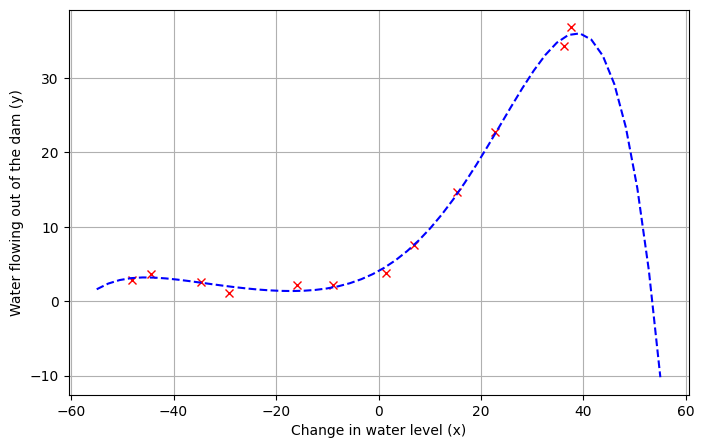

In [85]:
def plotFit(fit_theta,means,stds):
    """
    Function that takes in some learned fit values (on feature-normalized data)
    It sets x-points as a linspace, constructs an appropriate X matrix,
    un-does previous feature normalization, computes the hypothesis values,
    and plots on top of data
    """
    n_points_to_plot = 50
    xvals = np.linspace(-55,55,n_points_to_plot)
    xmat = np.ones((n_points_to_plot,1))
    xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
    xmat = genPolyFeatures(xmat,len(fit_theta)-2)
    xmat[:,1:] = xmat[:,1:] - means[1:]
    xmat[:,1:] = xmat[:,1:] / stds[1:]
    plotDSata()
    plt.plot(xvals,h(fit_theta,xmat),'b--')
plotFit(fit_theta,stored_means,stored_stds)

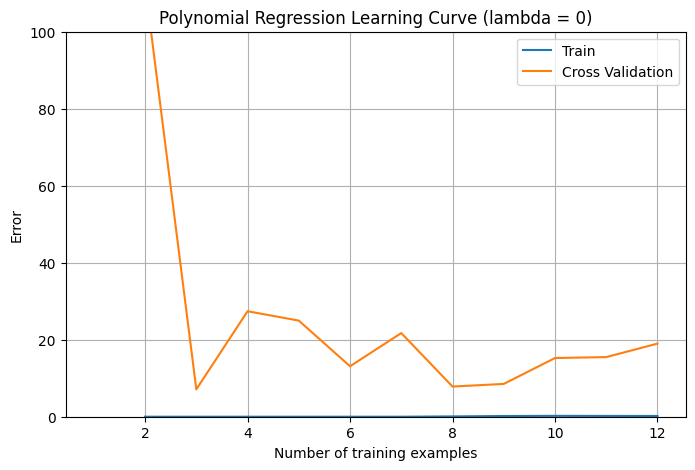

In [86]:
def plotPolyLearningCurve(mylambda=0.):

    initial_theta = np.ones((global_d+2,1))
    mym, error_train, error_val = [], [], []
    myXval, dummy1, dummy2 = featureNormalize(genPolyFeatures(Xval,global_d))

    for x in range(1,13,1):
        train_subset = X[:x,:]
        y_subset = y[:x]
        mym.append(y_subset.shape[0])
        train_subset = genPolyFeatures(train_subset,global_d)   
        train_subset, dummy1, dummy2 = featureNormalize(train_subset)
        fit_theta = optimizeTheta(initial_theta,train_subset,y_subset,mylambda=mylambda,print_output=False)
        error_train.append(computeCost(fit_theta,train_subset,y_subset,mylambda=mylambda))
        error_val.append(computeCost(fit_theta,myXval,yval,mylambda=mylambda))
        
    plt.figure(figsize=(8,5))
    plt.plot(mym,error_train,label='Train')
    plt.plot(mym,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Polynomial Regression Learning Curve (lambda = 0)')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.ylim([0,100])
    plt.grid(True)
    
plotPolyLearningCurve()

         Current function value: 8.042488
         Iterations: 5
         Function evaluations: 71
         Gradient evaluations: 60


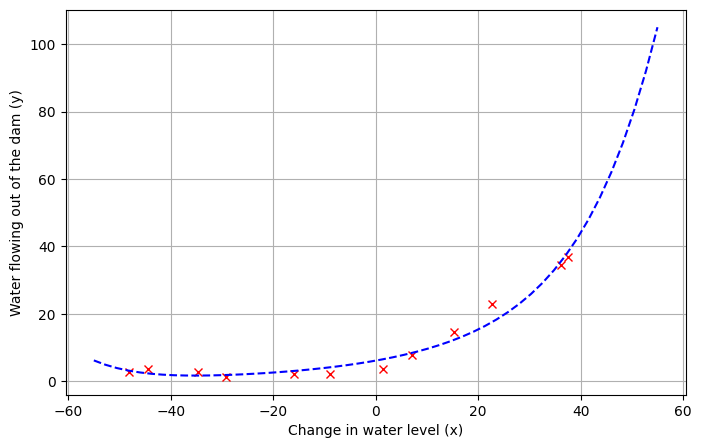

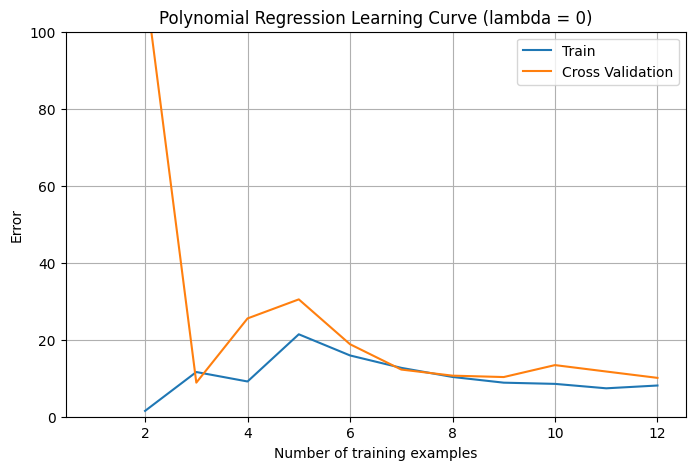

In [87]:
mytheta = np.zeros((newX_norm.shape[1],1))
fit_theta = optimizeTheta(mytheta,newX_norm,y,1)
plotFit(fit_theta,stored_means,stored_stds)
plotPolyLearningCurve(1.)

         Current function value: 129.978285
         Iterations: 0
         Function evaluations: 44
         Gradient evaluations: 32


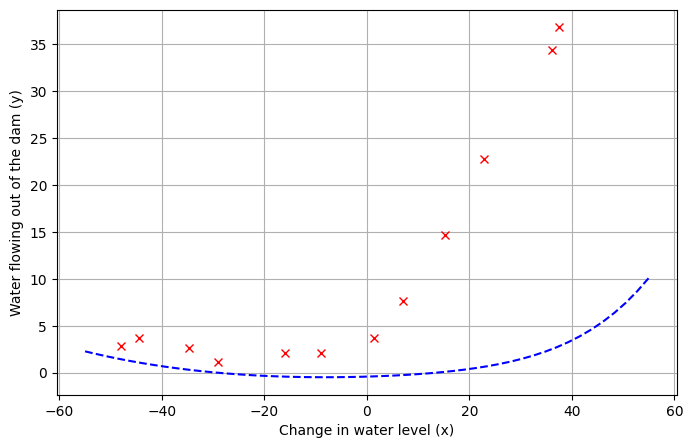

In [88]:
mytheta = np.random.rand(newX_norm.shape[1],1)
fit_theta = optimizeTheta(mytheta,newX_norm,y,100.)
plotFit(fit_theta,stored_means,stored_stds)

In [90]:
lambdas = np.linspace(0,5,20)
error_train, errors_val = [], []
for mylambda in lambdas:
    newXtrain = genPolyFeatures(X,global_d)
    newXtrain_norm, dummy1, dummy2 = featureNormalize(newXtrain)
    newXval = genPolyFeatures(Xval,global_d)
    newXval_norm, dummy1, dummy2 = featureNormalize(newXval)
    init_theta = np.ones((newX_norm.shape[1],1))
    fit_theta = optimizeTheta(mytheta,newXtrain_norm,y,mylambda,False)
    error_train.append(computeCost(fit_theta,newXtrain_norm,y,mylambda=mylambda))
    errors_val.append(computeCost(fit_theta,newXval_norm,yval,mylambda=mylambda))

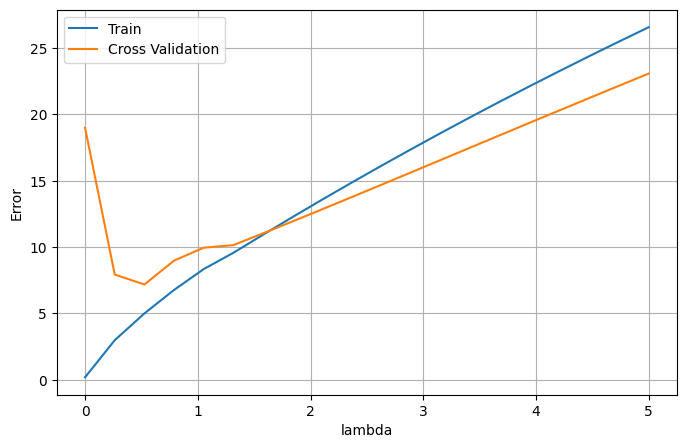

In [91]:
plt.figure(figsize=(8,5))
plt.plot(lambdas,error_train,label='Train')
plt.plot(lambdas,errors_val,label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)